<br>    
<img src="https://uniandes.edu.co/sites/default/files/logo-uniandes.png" width=200 height="100" align="left">
<h1 style="text-align:center;">IELE 4922</h1>
<h3 style='text-align: right;'> Departamento de Ingeniería Eléctrica y Electrónica &emsp;<br> Facultad de Ingeniería &emsp; <br>
     Universidad de los Andes &emsp; <br>
</h3>
&emsp;<b>Integrante 1:</b> Mauricio Ricardo Delgado Quintero - 201712801
<br>
&emsp;<b>Integrante 2:</b> Juan Camilo Pico Garrido - 201731674
<br>

# Punto 1 
Para el problema de multi-armed bandit, implemente un banco de pruebas (testbed) similar al considerado en clase y en el libro de texto, pero con 12 acciones con $q_*(a)$ generadas aleatoriamente de acuerdo a una distribución normal con media 8 y varianza 2.

Resuleva el problema de maximizar la suma de recompensas en un horizonte de tiempo de 3000 iteraciones con los siguientes algoritmos (implementada por usted):
- $\epsilon$-greedy con recompensa promedio.
- $\epsilon$-greedy con tamaño de paso constante.
- Gradient bandit.

Para cada caso ajuste apropiadamente los parámetros requeridos ($\alpha$ y/o $\epsilon$), y grafique el desempeño de los algoritmos en términos de recompensa recibida y porcentaje de iteraciones en que se selecciona la acción óptima.


# Solución 

Se empezó definir una funión para generar la media de las recompensas correspondientes a las 12 acciones, donde la recompensa de cada acción se distribuye de acuerdo a una $Normal(\mu=8, \sigma^2=2)$, y su varianza es de 1.

In [ ]:
#-------------------------------------Importar librerias--------------------------------------------------------------------
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.random.seed(10)

# Función para generar medias de recompensas
def generar_mu():
    return np.random.normal(8, np.sqrt(2), 12)


A continuación, se define la función $q_*(a)$ que retorna una recompensa aleatoria para cada posible acción:

In [ ]:
# Función para generar recompensa aleatoria de la acción i
def q(i):
    return np.random.normal(mu[i-1], 1)

## $\epsilon$-greedy con recompensa promedio

Para este algoritmo, estimamos el valor de cada acción mediante el promedio de las recompensas obtenidas para cada acción. Para ser eficientes computacionalmente, calculamos el promedio de forma incremental, de acuerdo a la siguiente ecuación:
$$Q_{k+1}=Q_k + \frac{1}{k}[R_k-Q_k]$$
Luego, elegimos con probabilidad $1-\epsilon$ la acción de la siguiente forma:
$$A_t = \underset{a}{\operatorname{argmax}}Q_t(a)$$
Por último, elegimos con probabilidad $\epsilon$ una acción de forma aleatoria.

In [22]:
%%time
# Inicializar matriz con los retornos promedio de los 1000 experimentos
retornos = np.zeros((4,3000))

# Inicializar matriz con el porcentaje de veces que se selecciona la acción óptima
conteo_optimo_prom = np.zeros((4 ,3000))

# Definir valores de epsilon para la calibración
epsilon = [0, 0.01, 0.1, 0.5]

for e in range(0,4):
    for j in range(1, 1001):
        
        # Generar la recompensa promedio de las 12 acciones
        mu = generar_mu()
        # Identificar la acción con mayor recompensa (acción óptima)
        a_opt = np.argmax(mu)+1
        # Inicializar lista con la estimación de q
        Q = [0]*12
        # Inicializar lista para guardar la recompensa en cada paso
        retorno = []
        # Inicializar lista para guardar la cantidad de veces que se selecciona cada acción
        conteo = [0]*12
        # Inicializar lista para guardar el porcentaje de veces que se elige la acción óptima
        conteo_optimo = []
        
        for i in range(1, 3001):
            # Para la primera iteración del algoritmo
            if i==1:
                # Seleccionar aleatoriamente entre las 12 acciones
                a = np.random.randint(1, 13) 
                
                # Actualizar el conteo de acciones
                conteo[a-1] = conteo[a-1]+1

                # Obtener recompensa de la acción seleccionada
                recompensa = q(a)

                # Actualizar lista de recompensas
                retorno.append(recompensa)
                
                # Actualizar el valor de Q(a) de forma incremental
                Q[a-1] = Q[a-1] + (1/conteo[a-1])*(recompensa-Q[a-1])
                
            # Para las demás iteraciones
            else:
                # Generar aleatorio entre 0 y 1
                p = np.random.uniform(0,1)
                
                # Si p es mayor a epsilon:
                if p > epsilon[e]:

                    # Elegir la acción con mayor estimación de recompensa
                    a = Q.index(max(Q))+1
                    
                    # Actualizar el conteo de acciones
                    conteo[a-1] = conteo[a-1]+1
   
                    # Obtener recompensa de la acción seleccionada
                    recompensa = q(a)
      
                    # Actualizar lista de recompensas
                    retorno.append(recompensa)
            
                    # Actualizar el valor de Q(a) de forma incremental
                    Q[a-1] = Q[a-1] + (1/conteo[a-1])*(recompensa-Q[a-1])
                
                # Si p es menor a epsilon
                else:
                    # Seleccionar aleatoriamente entre las 12 acciones
                    a = np.random.randint(1, 13)
                    
                    # Actualizar el conteo de acciones
                    conteo[a-1] = conteo[a-1]+1

                    # Obtener recompensa de la acción seleccionada
                    recompensa = q(a)
  
                    # Actualizar lista de recompensas
                    retorno.append(recompensa)
        
                    # Actualizar el valor de Q(a) de forma incremental
                    Q[a-1] = Q[a-1] + (1/conteo[a-1])*(recompensa-Q[a-1])
            
            # Calcular porcentaje de veces que se ha elegido la acción óptima
            conteo_optimo.append(conteo[a_opt-1]/i)
            
        # Actualizar el porcentaje promedio de veces que se ha elegido la acción óptima de forma incremental
        conteo_optimo_prom[e] = conteo_optimo_prom[e] + (1/j)*(conteo_optimo-conteo_optimo_prom[e])
        
        # Actualizar las recompensas promedio de los experimentos de forma incremental
        retornos[e] = retornos[e] + (1/j)*(retorno-retornos[e])

CPU times: user 1min 15s, sys: 255 ms, total: 1min 16s
Wall time: 1min 16s


A continuación ser observa la recompensa promedio obtenida en cada uno de los 3000 pasos para cada valor de $\epsilon$.

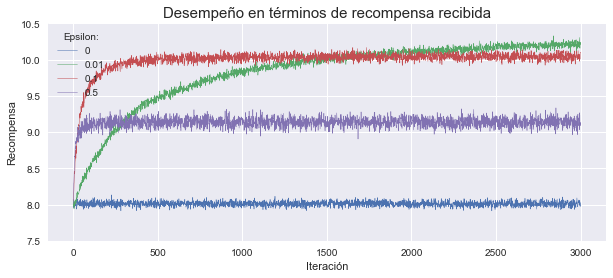

In [218]:
plt.figure(figsize=(10,4))
for i in range(4):
    plt.plot(retornos[i], linewidth=0.5)
plt.title("Desempeño en términos de recompensa recibida", size=15)
plt.xlabel("Iteración")
plt.ylabel("Recompensa")
plt.legend(("0", "0.01", "0.1","0.5"), title="Epsilon:")
plt.ylim((7.5,10.5))
plt.show()

En este caso se conluye que un $\epsilon$ óptimo podría estar entre 0.01 y 0.1, ya que permite encontrar recompensas altas en un tiempo apropiado.

A continuación se observa el porcentaje de veces que se selecciona la acción óptima para cada valor de $\epsilon$.

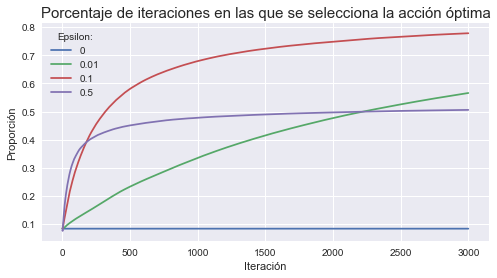

In [219]:
plt.figure(figsize=(8,4))
for i in range(4):
    plt.plot(conteo_optimo_prom[i])
plt.title("Porcentaje de iteraciones en las que se selecciona la acción óptima", size=15)
plt.xlabel("Iteración")
plt.ylabel("Proporción")
plt.legend(("0", "0.01", "0.1","0.5"), title="Epsilon:")
plt.show()

Se concluye que con un $\epsilon=0.1$ se escoge más rapidamente la acción óptima. Sin embargo, para este número de iteraciones se observa que con un $\epsilon=0.01$ el porcentaje de veces que se selecciona la acción óptima va incrementando, y un mayor número de iteraciones podría dar como resultado un algoritmo con un mayor porcentaje de aciertos.

## $\epsilon$-greedy con tamaño de paso constante

Para este algoritmo, estimamos el valor de cada acción de forma incremental pero con paso constante, dandole más peso a las recompensas recientes que a las pasadas:
$$Q_{k+1}=Q_k + \alpha [R_k-Q_k]$$
Luego, elegimos con probabilidad $1-\epsilon$ la acción de la siguiente forma:
$$A_t = \underset{a}{\operatorname{argmax}}Q_t(a)$$
Por último, elegimos con probabilidad $\epsilon$ una acción de forma aleatoria.

In [26]:
%%time

# Inicializar matriz con los retornos promedio de los 1000 experimentos
retornos2 = np.zeros((4,4,3000))

# Inicializar matriz con el porcentaje de veces que se selecciona la acción óptima
conteo_optimo_prom2 = np.zeros((4,4,3000))

# Definir valores de epsilon para la calibración
epsilon = [0, 0.01, 0.1, 0.5]

# Definir valores de alpha para la calibración
alpha = [0.05, 0.1, 0.2, 0.7]

for al in range(0,4):
    for e in range(0,4):
        for j in range(1, 1001):

            # Generar la recompensa promedio de las 12 acciones
            mu = generar_mu()
            # Identificar la acción con mayor recompensa (acción óptima)
            a_opt = np.argmax(mu)+1
            # Inicializar lista con la estimación de q
            Q = [0]*12
            # Inicializar lista para guardar la recompensa en cada paso
            retorno = []
            # Inicializar lista para guardar la cantidad de veces que se selecciona cada acción
            conteo = [0]*12
            # Inicializar lista para guardar el porcentaje de veces que se elige la acción óptima
            conteo_optimo = []

            for i in range(1, 3001):
                # Para la primera iteración del algoritmo
                if i==1:
                    # Seleccionar aleatoriamente entre las 12 acciones
                    a = np.random.randint(1, 13) 

                    # Actualizar el conteo de acciones
                    conteo[a-1] = conteo[a-1]+1

                    # Obtener recompensa de la acción seleccionada
                    recompensa = q(a)

                    # Actualizar lista de recompensas
                    retorno.append(recompensa)

                    # Actualizar el valor de Q(a) de forma incremental
                    Q[a-1] = Q[a-1] + alpha[al]*(recompensa-Q[a-1])

                # Para las demás iteraciones
                else:
                    # Generar aleatorio entre 0 y 1
                    p = np.random.uniform(0,1)

                    # Si p es mayor a epsilon:
                    if p > epsilon[e]:

                        # Elegir la acción con mayor estimación de recompensa
                        a = Q.index(max(Q))+1

                        # Actualizar el conteo de acciones
                        conteo[a-1] = conteo[a-1]+1

                        # Obtener recompensa de la acción seleccionada
                        recompensa = q(a)

                        # Actualizar lista de recompensas
                        retorno.append(recompensa)

                        # Actualizar el valor de Q(a) de forma incremental
                        Q[a-1] = Q[a-1] + alpha[al]*(recompensa-Q[a-1])

                    # Si p es menor a epsilon
                    else:
                        # Seleccionar aleatoriamente entre las 12 acciones
                        a = np.random.randint(1, 13)

                        # Actualizar el conteo de acciones
                        conteo[a-1] = conteo[a-1]+1

                        # Obtener recompensa de la acción seleccionada
                        recompensa = q(a)

                        # Actualizar lista de recompensas
                        retorno.append(recompensa)

                        # Actualizar el valor de Q(a) de forma incremental
                        Q[a-1] = Q[a-1] + alpha[al]*(recompensa-Q[a-1])

                # Calcular porcentaje de veces que se ha elegido la acción óptima
                conteo_optimo.append(conteo[a_opt-1]/i)

            # Actualizar el porcentaje promedio de veces que se ha elegido la acción óptima de forma incremental
            conteo_optimo_prom2[al,e] = conteo_optimo_prom2[al,e] + (1/j)*(conteo_optimo-conteo_optimo_prom2[al,e])
            
            # Actualizar las recompensas promedio de los experimentos de forma incremental
            retornos2[al,e] = retornos2[al,e] + (1/j)*(retorno-retornos2[al,e])

CPU times: user 4min 18s, sys: 666 ms, total: 4min 19s
Wall time: 4min 20s


A continuación se observa la recompensa promedio recibida para cada una de las 3000 iteraciones para cada valor de $\alpha$ y cada valor de $\epsilon$.

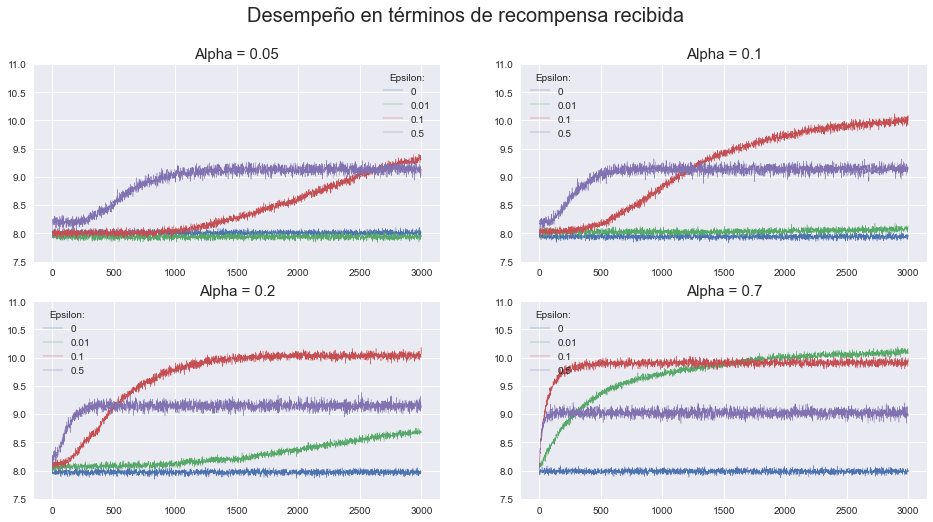

In [232]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
fig.suptitle('Desempeño en términos de recompensa recibida', size=20)
pos = [(0,0), (0,1), (1,0), (1,1)]
for al in range(0,4):
    for eps in range(0,4):
        axs[pos[al]].set_title('Alpha = '+str(alpha[al]), size=15)
        axs[pos[al]].plot(retornos2[al,eps,:], linewidth=0.4)
        axs[pos[al]].set_ylim([7.5, 11])
        axs[pos[al]].legend(("0", "0.01", "0.1","0.5"), title="Epsilon:")


Se puede concluir que el mejor algoritmo esta dado por un $\alpha=0.7$ y un $\epsilon$ entre 0.01 y 0.1, ya que permite encontrar recompensas altas rápidamente.

A continuación se observa el porcentaje de veces que se selecciona la acción óptima para cada valor de $\epsilon$ y $\alpha$.

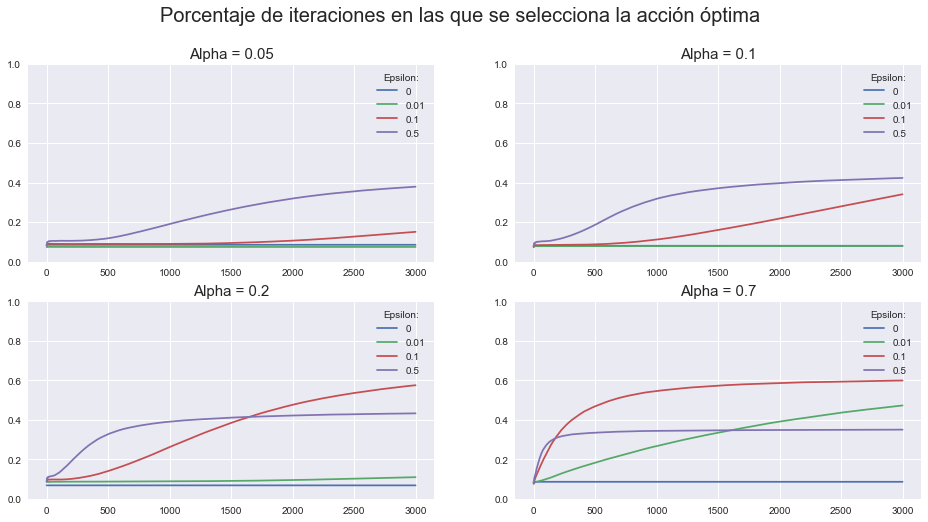

In [233]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
fig.suptitle('Porcentaje de iteraciones en las que se selecciona la acción óptima', size=20)
pos = [(0,0), (0,1), (1,0), (1,1)]
for al in range(0,4):
    for eps in range(0,4):
        axs[pos[al]].set_title('Alpha = '+str(alpha[al]), size=15)
        axs[pos[al]].plot(conteo_optimo_prom2[al,eps,:])
        axs[pos[al]].set_ylim([0, 1])
        axs[pos[al]].legend(("0", "0.01", "0.1","0.5"), title="Epsilon:")


Se concluye nuevamente que para este problema, este algoritmo tiene un mejor desempeño para un $\alpha=0.7$ y valores de $\epsilon$ entre 0.01 y 0.1, ya que se selecciona la acción óptima hasta el 60% de las veces.

## Gradient bandit

En primer lugar se definió una función para calcular la probabilidad de seleccionar cada una de las acciones, que esta definida como:
$$P[A_t=a]=\frac{e^{H_t(a)}}{\sum_{b=1}^{n} e^{H_t(b)}}=\pi_t(a)$$

In [207]:
def prob(H):
    return np.exp(H)/sum(np.exp(H))

Los valores de $H_t(a)$ se van actualizando en cada iteración del algoritmo después de seleccionar la acción $A_t$ y obtener la recompensa $R_t$ de la siguiente forma:
$$H_{t+1}(A_t)=H_{t}(A_t)+\alpha(R_t-\bar{R_t})(1-\pi_t(A_t))$$ y
$$H_{t+1}(a)=H_{t}(a)-\alpha(R_t-\bar{R_t})\pi_t(A_t) \quad \forall a\neq A_t$$

In [103]:
%%time

# Inicializar matriz con los retornos promedio de los 1000 experimentos
retornos3 = np.zeros((3, 3000, 1000))
# Definir valores de alpha para la calibración
alpha = [0.01, 0.1, 0.6]
# Inicializar matriz con el porcentaje de veces que se selecciona la acción óptima
conteo_optimo_prom3 = np.zeros((3 ,3000))

for al in range(0,3):
    for j in range(1, 1001):
        
        # Generar la recompensa promedio de las 12 acciones
        mu = generar_mu()
        # Identificar la acción con mayor recompensa (acción óptima)
        a_opt = np.argmax(mu)+1
        # Inicializar la lista con los valores de H
        H = [0]*12
        # Inicializar la lista para guardar la recompensa obtenida en cada paso
        retorno = []
        # Inicializar lista para guardar la cantidad de veces que se selecciona cada acción
        conteo = [0]*12
        # Inicializar lista para guardar el porcentaje de veces que se elige la acción óptima
        conteo_optimo = []
        # Inicializar la recompensa "baseline"
        baseline = 0
        
        for i in range(1, 3001):
            
            # Calcular las probabilidades de elegir cada acción con base en los H
            probs = prob(H)
            
            # Elegir acción de acuerdo a probabilidades
            a = np.random.choice(12, p = list(probs))+1
            
            # Actualizar el conteo de acciones
            conteo[a-1] = conteo[a-1]+1
            
            # Obtener recompensa de la acción a
            recompensa = q(a)
            
            # Actualizar lista de recompensas
            retorno.append(recompensa)
            
            # Actualizar baseline (recompensa promedio)
            baseline = baseline + (1/i)*(recompensa-baseline)
    
            # Actualizar valores de H
            for k in range(1, 13):
                if k==a:
                    H[k-1] = H[k-1] + alpha[al]*(recompensa-baseline)*(1-probs[k-1])
                else:
                    H[k-1] = H[k-1] - alpha[al]*(recompensa-baseline)*(probs[k-1])
        
            # Calcular porcentaje de veces que se ha elegido la acción óptima
            conteo_optimo.append(conteo[a_opt-1]/i)
            
        # Actualizar el porcentaje promedio de veces que se ha elegido la acción óptima de forma incremental
        conteo_optimo_prom3[al] = conteo_optimo_prom3[al] + (1/j)*(conteo_optimo-conteo_optimo_prom3[al])
        # Guardar el retorno del experimento j
        retornos3[al][:,j-1] = retorno

CPU times: user 5min 3s, sys: 892 ms, total: 5min 4s
Wall time: 5min 6s


In [104]:
retorno_prom = retornos3.mean(axis=2)
retorno_prom.shape

(3, 3000)

A continuación ser observa la recompensa promedio obtenida en cada uno de los 3000 pasos para cada valor de $\alpha$.

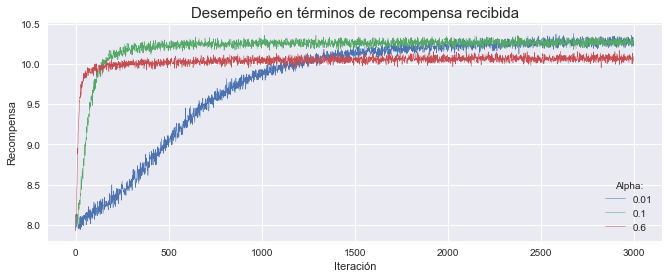

In [220]:
plt.figure(figsize=(11,4))
for i in range(3):
    plt.plot(retorno_prom[i], linewidth=0.5)
plt.title("Desempeño en términos de recompensa recibida", size=15)
plt.xlabel("Iteración")
plt.ylabel("Recompensa")
plt.legend(("0.01", "0.1", "0.6"), title="Alpha:")
plt.show()

Para este caso, un $\alpha=0.1$ permite obtener las mejores recompensas rapidamente.

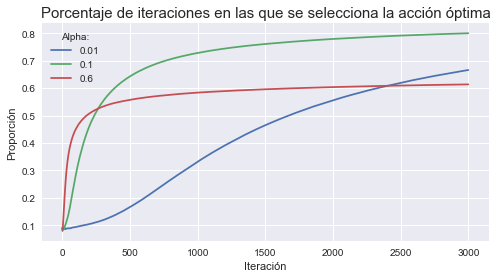

In [222]:
plt.figure(figsize=(8,4))
for i in range(3):
    plt.plot(conteo_optimo_prom3[i])
plt.title("Porcentaje de iteraciones en las que se selecciona la acción óptima", size=15)
plt.xlabel("Iteración")
plt.ylabel("Proporción")
plt.legend(("0.01", "0.1","0.6"), title="Alpha:")
plt.show()

# Punto 2 
Repita el experimento, pero ahora $q_{*}(a)+ N_{t}$, donde $q_{*}(a)$ es definida como antes y $N_{t}$ es una variable aleatoria con media cero y varianza $\sigma^{2}$. Considere los casos $\sigma^2=0,001,0,01,0,1.$ Para este caso utilice un horizonte de tiempo de 300000 iteraciones.

# Solución 

## $\epsilon$-greedy con recompensa promedio

In [169]:
%%time

# Inicializar matriz con los retornos promedio de los 1000 experimentos
retornos4 = np.zeros((3, 3, 10000))

# Inicializar matriz con el porcentaje de veces que se selecciona la acción óptima
conteo_optimo_prom4 = np.zeros((3, 3, 10000))

# Definir valores de epsilon para la calibración
epsilon = [0.01, 0.1, 0.5]

# Definir valores de sigma
sigma = [0.001, 0.01, 0.1]

# Matriz de mu
mus = np.zeros((800, 12, 10000))

for s in range(0,3):
    for e in range(0,3):
        for j in range(1, 801):

            # Generar la recompensa promedio de las 12 acciones
            mu = generar_mu()
            
            # Inicializar lista con la estimación de q
            Q = [0]*12
            # Inicializar lista para guardar la recompensa en cada paso
            retorno = []
            # Inicializar lista para guardar la cantidad de veces que se selecciona cada acción
            conteo = [0]*12
            # Inicializar lista para guardar el porcentaje de veces que se elige la acción óptima
            conteo_optimo = []
            # Inicializar contador para guardar la cantidad de veces que se ha elegido la acción optima
            k_opt = 0

            for i in range(1, 10001):
                # guardar mu
                mus[j-1, :, i-1] = mu
                
                # Actualizar el valor de mu
                mu = mu + np.random.normal(0, np.sqrt(sigma[s]), 12)
                
                # Identificar la acción con mayor recompensa (acción óptima)
                a_opt = np.argmax(mu)+1
                
                # Para la primera iteración del algoritmo
                if i==1:
                    # Seleccionar aleatoriamente entre las 12 acciones
                    a = np.random.randint(1, 13) 

                    # Actualizar el conteo de acciones
                    conteo[a-1] = conteo[a-1]+1

                    # Obtener recompensa de la acción seleccionada
                    recompensa = q(a)

                    # Actualizar lista de recompensas
                    retorno.append(recompensa)

                    # Actualizar el valor de Q(a) de forma incremental
                    Q[a-1] = Q[a-1] + (1/conteo[a-1])*(recompensa-Q[a-1])

                # Para las demás iteraciones
                else:
                    # Generar aleatorio entre 0 y 1
                    p = np.random.uniform(0,1)

                    # Si p es mayor a epsilon:
                    if p > epsilon[e]:

                        # Elegir la acción con mayor estimación de recompensa
                        a = Q.index(max(Q))+1

                        # Actualizar el conteo de acciones
                        conteo[a-1] = conteo[a-1]+1

                        # Obtener recompensa de la acción seleccionada
                        recompensa = q(a)

                        # Actualizar lista de recompensas
                        retorno.append(recompensa)

                        # Actualizar el valor de Q(a) de forma incremental
                        Q[a-1] = Q[a-1] + (1/conteo[a-1])*(recompensa-Q[a-1])

                    # Si p es menor a epsilon
                    else:
                        # Seleccionar aleatoriamente entre las 12 acciones
                        a = np.random.randint(1, 13)

                        # Actualizar el conteo de acciones
                        conteo[a-1] = conteo[a-1]+1

                        # Obtener recompensa de la acción seleccionada
                        recompensa = q(a)

                        # Actualizar lista de recompensas
                        retorno.append(recompensa)

                        # Actualizar el valor de Q(a) de forma incremental
                        Q[a-1] = Q[a-1] + (1/conteo[a-1])*(recompensa-Q[a-1])

                # Contar las veces que se ha elegido la acción óptima
                if a == a_opt:
                    k_opt = k_opt+1
         
                # Calcular porcentaje de veces que se ha elegido la acción óptima
                conteo_optimo.append(k_opt/i)

            # Actualizar el porcentaje promedio de veces que se ha elegido la acción óptima de forma incremental
            conteo_optimo_prom4[s,e] = conteo_optimo_prom4[s,e] + (1/j)*(conteo_optimo-conteo_optimo_prom4[s,e])

            # Actualizar las recompensas promedio de los experimentos de forma incremental
            retornos4[s,e] = retornos4[s,e] + (1/j)*(retorno-retornos4[s,e])

CPU times: user 16min 18s, sys: 6.01 s, total: 16min 24s
Wall time: 16min 30s


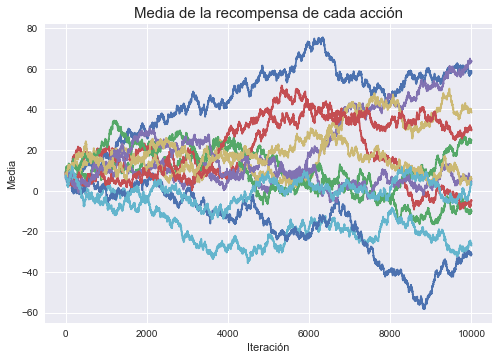

In [223]:
for i in range(12):
    plt.plot(mus[0, i])
plt.title("Media de la recompensa de cada acción", size=15)
plt.xlabel("Iteración")
plt.ylabel("Media")
plt.show()

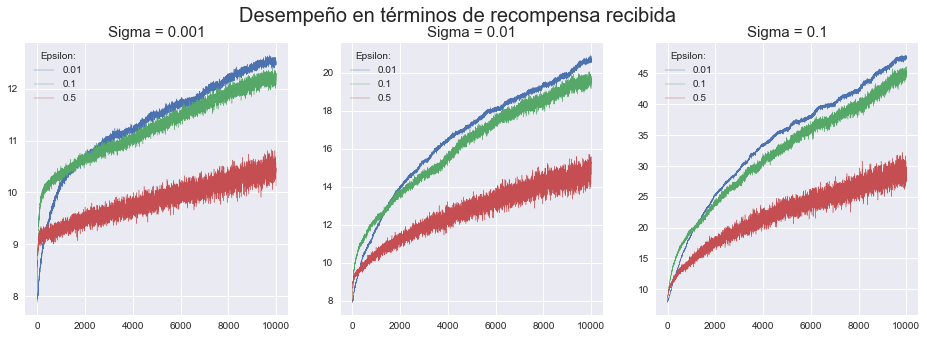

In [238]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle('Desempeño en términos de recompensa recibida', size=20)

for s in range(0,3):
    axs[s].set_title('Sigma = '+str(sigma[s]), size=15)
    for eps in range(0,3):
        axs[s].plot(retornos4[s,eps,:], linewidth=0.4)
    axs[s].legend(("0.01", "0.1","0.5"), title="Epsilon:")

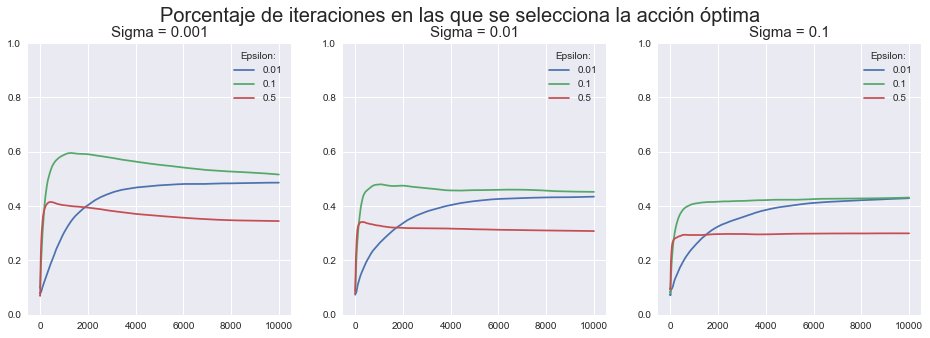

In [241]:
fig, axs = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Porcentaje de iteraciones en las que se selecciona la acción óptima', size=20)

for s in range(0,3):
    axs[s].set_title('Sigma = '+str(sigma[s]), size=15)
    axs[s].set_ylim([0, 1])
    for eps in range(0,3):
        axs[s].plot(conteo_optimo_prom4[s,eps,:])
    axs[s].legend(("0.01", "0.1","0.5"), title="Epsilon:")


## $\epsilon$-greedy con tamaño de paso constante

In [201]:
%%time

# Inicializar matriz con los retornos promedio de los 1000 experimentos
retornos5 = np.zeros((3,3,3,8000))

# Inicializar matriz con el porcentaje de veces que se selecciona la acción óptima
conteo_optimo_prom5 = np.zeros((3,3,3,8000))

# Definir valores de epsilon para la calibración
epsilon = [0.01, 0.1, 0.5]

# Definir valores de alpha para la calibración
alpha = [0.05, 0.1, 0.7]

# Definir valores de sigma
sigma = [0.001, 0.01, 0.1]

for s in range(0,3):
    for al in range(0,3):
        for e in range(0,3):
            for j in range(1,701):

                # Generar la recompensa promedio de las 12 acciones
                mu = generar_mu()
                # Inicializar lista con la estimación de q
                Q = [0]*12
                # Inicializar lista para guardar la recompensa en cada paso
                retorno = []
                # Inicializar lista para guardar la cantidad de veces que se selecciona cada acción
                conteo = [0]*12
                # Inicializar lista para guardar el porcentaje de veces que se elige la acción óptima
                conteo_optimo = []
                # Inicializar contador para guardar la cantidad de veces que se ha elegido la acción optima
                k_opt = 0

                for i in range(1, 8001):
                    # Actualizar el valor de mu
                    mu = mu + np.random.normal(0, np.sqrt(sigma[s]), 12)
                    # Identificar la acción con mayor recompensa (acción óptima)
                    a_opt = np.argmax(mu)+1
                    # Para la primera iteración del algoritmo
                    if i==1:
                        # Seleccionar aleatoriamente entre las 12 acciones
                        a = np.random.randint(1, 13) 

                        # Actualizar el conteo de acciones
                        conteo[a-1] = conteo[a-1]+1

                        # Obtener recompensa de la acción seleccionada
                        recompensa = q(a)

                        # Actualizar lista de recompensas
                        retorno.append(recompensa)

                        # Actualizar el valor de Q(a) de forma incremental
                        Q[a-1] = Q[a-1] + alpha[al]*(recompensa-Q[a-1])

                    # Para las demás iteraciones
                    else:
                        # Generar aleatorio entre 0 y 1
                        p = np.random.uniform(0,1)

                        # Si p es mayor a epsilon:
                        if p > epsilon[e]:

                            # Elegir la acción con mayor estimación de recompensa
                            a = Q.index(max(Q))+1

                            # Actualizar el conteo de acciones
                            conteo[a-1] = conteo[a-1]+1

                            # Obtener recompensa de la acción seleccionada
                            recompensa = q(a)

                            # Actualizar lista de recompensas
                            retorno.append(recompensa)

                            # Actualizar el valor de Q(a) de forma incremental
                            Q[a-1] = Q[a-1] + alpha[al]*(recompensa-Q[a-1])

                        # Si p es menor a epsilon
                        else:
                            # Seleccionar aleatoriamente entre las 12 acciones
                            a = np.random.randint(1, 13)

                            # Actualizar el conteo de acciones
                            conteo[a-1] = conteo[a-1]+1

                            # Obtener recompensa de la acción seleccionada
                            recompensa = q(a)

                            # Actualizar lista de recompensas
                            retorno.append(recompensa)

                            # Actualizar el valor de Q(a) de forma incremental
                            Q[a-1] = Q[a-1] + alpha[al]*(recompensa-Q[a-1])

                    # Contar las veces que se ha elegido la acción óptima
                    if a == a_opt:
                        k_opt = k_opt+1
                    # Calcular porcentaje de veces que se ha elegido la acción óptima
                    conteo_optimo.append(k_opt/i)

                # Actualizar el porcentaje promedio de veces que se ha elegido la acción óptima de forma incremental
                conteo_optimo_prom5[s,al,e] = conteo_optimo_prom5[s,al,e] + (1/j)*(conteo_optimo-conteo_optimo_prom5[s,al,e])

                # Actualizar las recompensas promedio de los experimentos de forma incremental
                retornos5[s,al,e] = retornos5[s,al,e] + (1/j)*(retorno-retornos5[s,al,e])

CPU times: user 31min 21s, sys: 4.17 s, total: 31min 25s
Wall time: 41min 28s


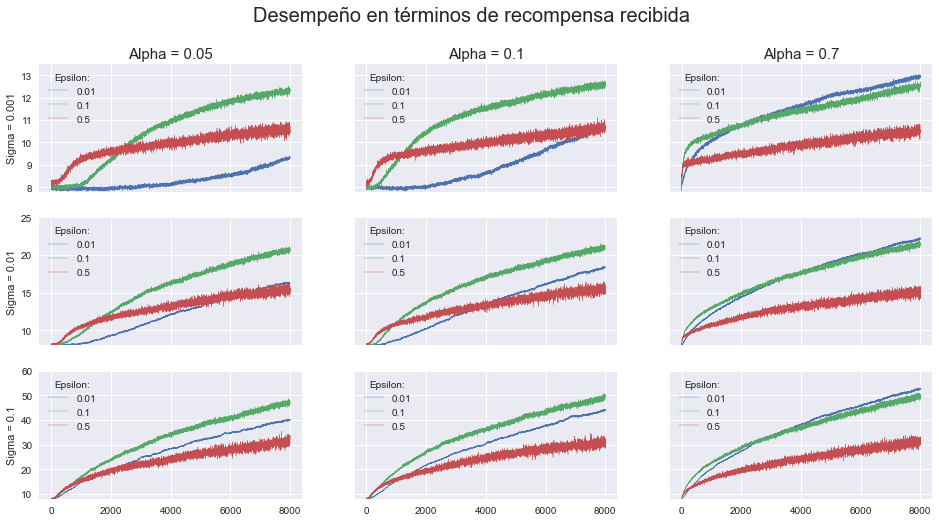

In [252]:
fig, axs = plt.subplots(3,3, figsize=(16,8))
fig.suptitle('Desempeño en términos de recompensa recibida', size=20)
for s in range(0,3):
    axs[s,0].set(ylabel='Sigma = '+str(sigma[s]))
    for al in range(0,3):
        axs[0,al].set_ylim([7.8, 13.5])
        axs[1,al].set_ylim([8, 25])
        axs[2,al].set_ylim([8, 60])
        if s==0:
            axs[s,al].set_title('Alpha = '+str(alpha[al]), size=15)
        for eps in range(0,3):
            axs[s,al].plot(retornos5[s,al,eps,:], linewidth=0.4)
            axs[s,al].legend(("0.01", "0.1","0.5"), title="Epsilon:")
for ax in axs.flat:
    ax.label_outer()

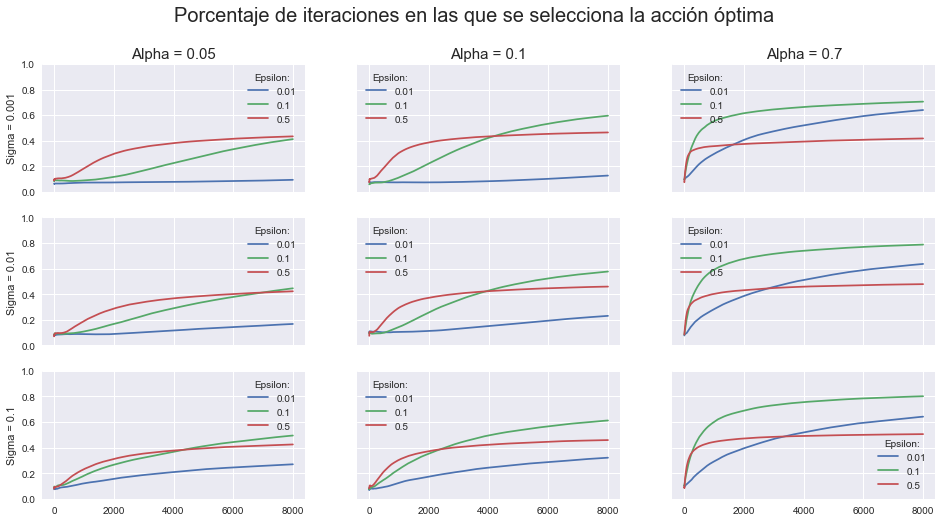

In [253]:
fig, axs = plt.subplots(3,3, figsize=(16,8))
fig.suptitle('Porcentaje de iteraciones en las que se selecciona la acción óptima', size=20)
for s in range(0,3):
    axs[s,0].set(ylabel='Sigma = '+str(sigma[s]))
    for al in range(0,3):
        axs[s,al].set_ylim([0, 1])
        if s==0:
            axs[s,al].set_title('Alpha = '+str(alpha[al]), size=15)
        for eps in range(0,3):
            axs[s,al].plot(conteo_optimo_prom5[s,al,eps,:])
            axs[s,al].legend(("0.01", "0.1","0.5"), title="Epsilon:")
for ax in axs.flat:
    ax.label_outer()

## Gradient Bandit

In [208]:
%%time

# Inicializar matriz con los retornos promedio de los 1000 experimentos
retornos6 = np.zeros((3,3,8000))
# Definir valores de alpha para la calibración
alpha = [0.01, 0.1, 0.6]
# Inicializar matriz con el porcentaje de veces que se selecciona la acción óptima
conteo_optimo_prom6 = np.zeros((3,3 ,8000))
# Definir valores de sigma
sigma = [0.001, 0.01, 0.1]

for s in range(3):
    for al in range(0,3):
        for j in range(1, 701):

            # Generar la recompensa promedio de las 12 acciones
            mu = generar_mu()
            # Inicializar la lista con los valores de H
            H = [0]*12
            # Inicializar la lista para guardar la recompensa obtenida en cada paso
            retorno = []
            # Inicializar lista para guardar la cantidad de veces que se selecciona cada acción
            conteo = [0]*12
            # Inicializar lista para guardar el porcentaje de veces que se elige la acción óptima
            conteo_optimo = []
            # Inicializar la recompensa "baseline"
            baseline = 0
            # Inicializar contador para guardar la cantidad de veces que se ha elegido la acción optima
            k_opt = 0

            for i in range(1, 8001):
                
                # Actualizar el valor de mu
                mu = mu + np.random.normal(0, np.sqrt(sigma[s]), 12)

                # Identificar la acción con mayor recompensa (acción óptima)
                a_opt = np.argmax(mu)+1

                # Calcular las probabilidades de elegir cada acción con base en los H
                probs = prob(H)

                # Elegir acción de acuerdo a probabilidades
                a = np.random.choice(12, p = list(probs))+1

                # Actualizar el conteo de acciones
                conteo[a-1] = conteo[a-1]+1

                # Obtener recompensa de la acción a
                recompensa = q(a)

                # Actualizar lista de recompensas
                retorno.append(recompensa)

                # Actualizar baseline (recompensa promedio)
                baseline = baseline + (1/i)*(recompensa-baseline)

                # Actualizar valores de H
                for k in range(1, 13):
                    if k==a:
                        H[k-1] = H[k-1] + alpha[al]*(recompensa-baseline)*(1-probs[k-1])
                    else:
                        H[k-1] = H[k-1] - alpha[al]*(recompensa-baseline)*(probs[k-1])

                # Contar las veces que se ha elegido la acción óptima
                if a == a_opt:
                    k_opt = k_opt+1
                # Calcular porcentaje de veces que se ha elegido la acción óptima
                conteo_optimo.append(k_opt/i)

            # Actualizar el porcentaje promedio de veces que se ha elegido la acción óptima de forma incremental
            conteo_optimo_prom6[s,al] = conteo_optimo_prom6[s,al] + (1/j)*(conteo_optimo-conteo_optimo_prom6[s,al])
            # Actualizar las recompensas promedio de los experimentos de forma incremental
            retornos6[s,al] = retornos6[s,al] + (1/j)*(retorno-retornos6[s,al])

CPU times: user 33min 9s, sys: 6.81 s, total: 33min 16s
Wall time: 2h 24min 13s


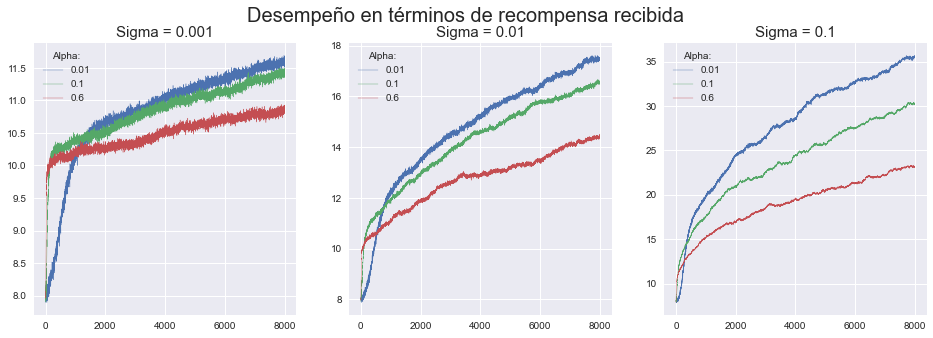

In [254]:
fig, axs = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Desempeño en términos de recompensa recibida', size=20)

for s in range(0,3):
    axs[s].set_title('Sigma = '+str(sigma[s]), size=15)
    for al in range(0,3):
        axs[s].plot(retornos6[s,al,:], linewidth=0.4)
    axs[s].legend(("0.01", "0.1","0.6"), title="Alpha:")


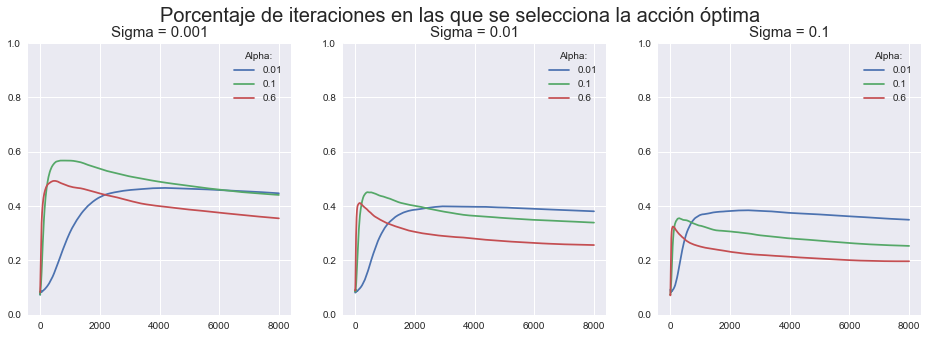

In [255]:
fig, axs = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Porcentaje de iteraciones en las que se selecciona la acción óptima', size=20)

for s in range(0,3):
    axs[s].set_title('Sigma = '+str(sigma[s]), size=15)
    axs[s].set_ylim([0, 1])
    for al in range(0,3):
        axs[s].plot(conteo_optimo_prom6[s,al,:])
    axs[s].legend(("0.01", "0.1","0.6"), title="Alpha:")
